<a href="https://colab.research.google.com/github/hamzabinashraf/Deep-Learning-Projects/blob/main/Object_Detection_Using_Yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instal requried framework and libraris
!pip install torch torcchvision opencv_python

In [2]:
# clone yolov5 from github
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.62 MiB | 24.68 MiB/s, done.
Resolving deltas: 100% (11694/11694), done.


In [3]:
#install requried modules from the yolovd requriments
!pip install -r /content/yolov5/requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 23.6 MB/s eta 0:00:00


In [4]:
# import requried librabies
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow

In [5]:
# Load the pre-trained YOLOv5s model from PyTorch Hub
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

/usr/local/lib/python3.10/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-11-1 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 172MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [6]:
def detect_objects(image_path):
  """
  Detects objects in an image using the YOLOv5 model.

  Args:
    image_path: The path to the image file.

  Returns:
    None. Displays the image with detected objects.
  """
  try:
    # Open the image using PIL
    img = Image.open(image_path)
    # Convert the image to a NumPy array
    img_rgb = np.array(img)

  except Exception as e:
    print(f"Error opening image: {e}")
    return

  # Perform object detection using the YOLOv5 model
  results = model(img_rgb)

  # Get the detection results as a pandas DataFrame
  detections = results.pandas().xyxy[0]

  print('Detections: ', detections)

  # Convert the image to BGR format for OpenCV
  img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

  # Iterate over the detections and draw bounding boxes and labels
  for _, row in detections.iterrows():
    # Extract bounding box coordinates and confidence score
    x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
    confidence = row['confidence']

    # Create the label text
    label = f'{row["name"]}: {confidence:.2f}'

    # Draw a bounding box around the object
    cv2.rectangle(img_bgr, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Add the label text to the image
    cv2.putText(img_bgr, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

  # Resize the image for display
  img_resized = cv2.resize(img_bgr, (1024, 768))

  # Display the image with detected objects
  cv2_imshow(img_resized)

/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Detections:           xmin        ymin        xmax        ymax  confidence  class    name
0    0.000000   46.167862  244.261658  349.737793    0.854890     16     dog
1  359.083923  209.807053  509.611969  342.669952    0.846884     15     cat
2  157.385574    8.846721  498.775024  349.941101    0.348998      0  person


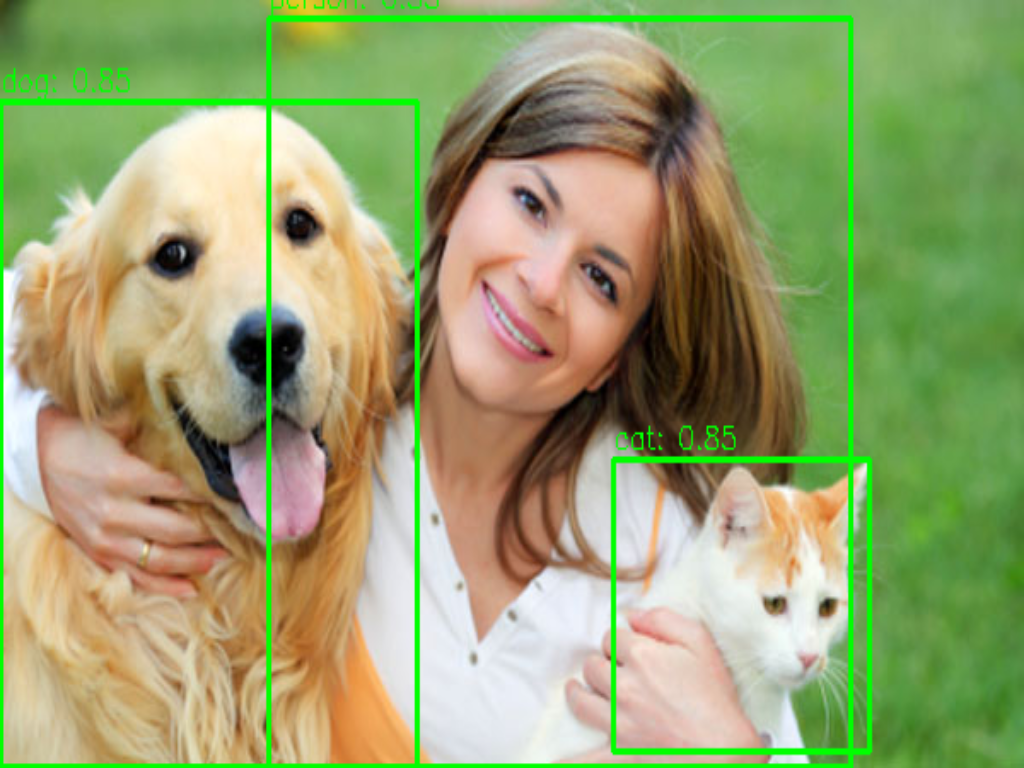

In [11]:
image_path = 'dog.jpg'
detect_objects(image_path)